# Generator

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
import pandas as pd
import time
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import (Dense, Flatten, Reshape,
                                     Conv2D, Conv2DTranspose, LeakyReLU, BatchNormalization, Input)
from tensorflow.keras.datasets import mnist

2024-06-28 11:14:35.795507: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-28 11:14:35.824125: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-28 11:14:36.291880: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
latent_space_size = 10

def get_random_input_vector(latent_space_size, batch_size=1):
    
    #Create an array of the given shape and populate it with random samples from a uniform distribution over [0, 1)
    
    random_vector = np.random.rand(batch_size, latent_space_size)
    
    return random_vector



In [3]:
def make_generator_model(latent_space_size):
    model = keras.Sequential()
    model.add(Input(shape=(latent_space_size,)))

    model.add(Dense(7 * 7 * 256, use_bias=False))
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    model.add(Reshape((7, 7, 256)))

    model.add(Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    model.add(Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    model.add(Conv2DTranspose(32, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    model.add(Conv2DTranspose(1, (5, 5), strides=(1, 1), padding='same', use_bias=False, activation='sigmoid'))

    return model



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12544)          │       125,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 12544)          │        50,176 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 7, 7, 128)      │       819,200 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 14, 14, 64)     │       204,800 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 28, 28, 32)     │        51,200 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 28, 28, 1)      │           800 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,252,512 (4.78 MB)

 Trainable params: 1,226,976 (4.68 MB)

 Non-trainable params: 25,536 (99.75 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


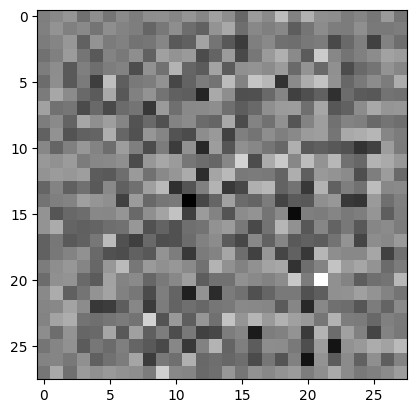

In [4]:
# Create generator model
generator = make_generator_model(latent_space_size)
generator.summary()

# Generate an image using the generator model
random_vector = get_random_input_vector(latent_space_size)
generated_image = generator.predict(random_vector)
plt.imshow(generated_image.reshape(28, 28), cmap='gray')
plt.show()

### Import Mnist dataset

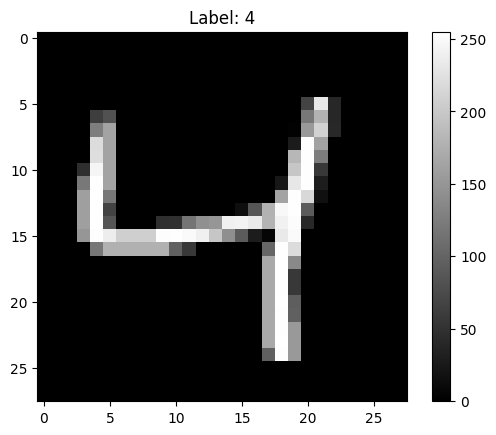

In [5]:
# Charger les données MNIST
digits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
#digits = [0, 1]

mnist = fetch_openml('mnist_784', version=1)
X = mnist.data  # Utiliser un tout ensemble pour la rapidité
 
X = X.to_numpy()
y = mnist.target.astype(int)

mask = np.array([l in digits for l in y])
X = X[mask]
y = y[mask]

X = X[:4000]


# Check if X is a DataFrame and convert the first row to a numpy array for visualization
def visualize_image(loc, X, y):
    if isinstance(X, pd.DataFrame):
        image_matrix = X.iloc[loc].values.reshape(28, 28)
        y = y.to_numpy()
    else:
        image_matrix = X[loc].reshape(28, 28)

    # Visualize the image
    plt.imshow(image_matrix, cmap='gray')
    try:
        plt.title(f"Label: {y[loc]}")
    except:
        plt.title('Label: undifined')
    plt.colorbar()
    plt.show()


# Visualize the first image
visualize_image(2, X, y)

In [6]:
type(X)

numpy.ndarray

# Discriminator

In [7]:
def make_discriminator_model():
    model = keras.Sequential()
    model.add(Input(shape=(28, 28, 1)))

    model.add(Conv2D(64, (5, 5), strides=(2, 2), padding='same'))
    model.add(LeakyReLU())
    model.add(Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(LeakyReLU())
    model.add(Conv2D(256, (5, 5), strides=(2, 2), padding='same'))
    model.add(LeakyReLU())
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))

    return model


In [8]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=False)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)


In [9]:
ones = tf.ones((1, 1))
zeros = tf.zeros((1, 1))

cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)


dis_loss = discriminator_loss(ones, zeros)
gen_loss = generator_loss(zeros)

print('dis_loss', dis_loss)
print('gen_loss', gen_loss)


dis_loss tf.Tensor(1.0064089, shape=(), dtype=float32)
gen_loss tf.Tensor(0.6931472, shape=(), dtype=float32)


In [10]:
generated_image = generator.predict(random_vector)
generated_image.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


(1, 28, 28, 1)

In [11]:
def create_batch_data(size=500, X=None, latent_space_size=latent_space_size):
    batch_real_images = X[:size]
    X = X[size:]
    random_vector = get_random_input_vector(latent_space_size, batch_size=size)
    batch_fake_images = generator.predict(random_vector)
    
    batch_real_images = batch_real_images.reshape(size, 28, 28, 1)

    print('batch_real_images', batch_real_images.shape)
    print('batch_fake_images', batch_fake_images.shape)
    
    batch_data = np.concatenate([batch_real_images, batch_fake_images])
    
    return batch_data, X



In [12]:
batch_data, remaining_data = create_batch_data(500, X, latent_space_size)
batch_data

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
batch_real_images (500, 28, 28, 1)
batch_fake_images (500, 28, 28, 1)


array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.  

In [13]:
# Check the shape of the batch data
print(batch_data.shape)

(1000, 28, 28, 1)


In [14]:
batch_data[0].shape

(28, 28, 1)

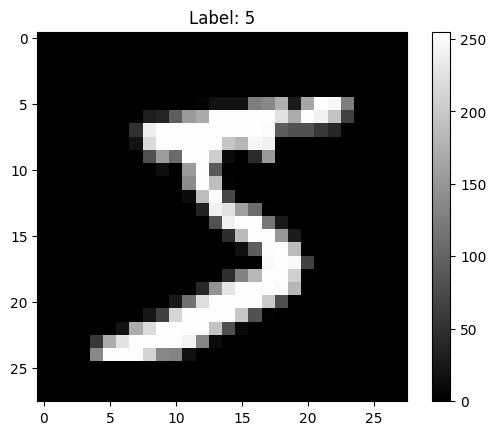

In [15]:
visualize_image(0, batch_data, y)

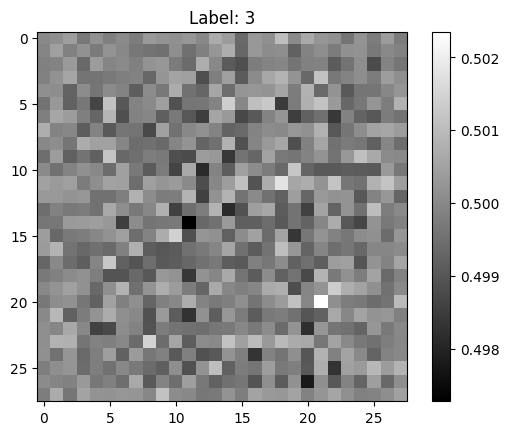

In [16]:
visualize_image(500, batch_data, y)


In [17]:
# Optimizers for the generator and discriminator
# Optimizers for the generator and discriminator
generator_optimizer = tf.keras.optimizers.Adam(1e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4, beta_1=0.5)


# Create the discriminator model
discriminator = make_discriminator_model()
discriminator.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 14, 14, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 256)      │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,030,145 (3.93 MB)

 Trainable params: 1,030,145 (3.93 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Training step function
@tf.function
def train_step(real_images):
    noise = get_random_input_vector(latent_space_size, batch_size=real_images.shape[0])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(real_images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss

In [19]:
# Adjusted train function to include the save directory and save loss values
def train(dataset, epochs, save_dir, model_save_dir, loss_save_file):
    gen_losses = []
    disc_losses = []

    for epoch in range(epochs):
        for image_batch in dataset:
            gen_loss, disc_loss = train_step(image_batch)

        gen_losses.append(gen_loss)
        disc_losses.append(disc_loss)

        print(f'Epoch {epoch + 1}, Generator Loss: {gen_loss}, Discriminator Loss: {disc_loss}')

        if (epoch + 1) % 10 == 0:
            generate_and_save_images(generator, epoch + 1, get_random_input_vector(latent_space_size), save_dir)
            generator.save(os.path.join(model_save_dir, 'generator_epoch_{:04d}'.format(epoch + 1) + 
                                        'latent_space_size' + str(latent_space_size) + '.h5'))
            discriminator.save(os.path.join(model_save_dir, 'discriminator_epoch_{:04d}.h5'.format(epoch + 1)+ 
                                            'latent_space_size' + str(latent_space_size) + '.h5'))

    generate_and_save_images(generator, epochs, get_random_input_vector(latent_space_size), save_dir)

    # Save the loss values
    np.savez(loss_save_file, gen_losses=gen_losses, disc_losses=disc_losses)


In [20]:
# Helper function to generate and save images in a specific directory
def generate_and_save_images(model, epoch, test_input, save_dir):
    predictions = model(test_input, training=False)

    fig = plt.figure(figsize=(4, 4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i + 1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')

    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
        
    plt.savefig(os.path.join(save_dir, 'image_at_epoch_{:04d}.png'.format(epoch)))
    plt.show()

In [21]:
# Prepare the dataset
def prepare_dataset(X, batch_size):
    X = X / 255.0  # Normalize the images to [0, 1]
    X = X.reshape(-1, 28, 28, 1).astype('float32')
    dataset = tf.data.Dataset.from_tensor_slices(X).shuffle(60000).batch(batch_size, drop_remainder=True)
    return dataset

/home/duincan/miniconda3/envs/Unsupervised/lib/python3.11/site-packages/keras/src/backend/tensorflow/nn.py:681: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2024-06-28 11:14:40.930605: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'gradient_tape/sequential_1_4/leaky_re_lu_6_1/LeakyRelu/LeakyReluGrad' exist for missing node 'sequential_1_4/conv2d_2_1/add'.
2024-06-28 11:14:44.146760: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 1, Generator Loss: 1.250370740890503, Discriminator Loss: 1.0016649961471558


2024-06-28 11:14:47.205165: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 2, Generator Loss: 1.4923367500305176, Discriminator Loss: 0.6447427272796631


2024-06-28 11:14:50.330145: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 3, Generator Loss: 1.33366060256958, Discriminator Loss: 0.6002864837646484


2024-06-28 11:14:53.449915: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 4, Generator Loss: 1.2104244232177734, Discriminator Loss: 0.7795755863189697


2024-06-28 11:14:56.593444: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 5, Generator Loss: 0.866212010383606, Discriminator Loss: 0.998680830001831


2024-06-28 11:14:59.753417: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 6, Generator Loss: 0.8585408926010132, Discriminator Loss: 0.9993618726730347


2024-06-28 11:15:03.023538: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 7, Generator Loss: 0.6419928669929504, Discriminator Loss: 1.1404595375061035


2024-06-28 11:15:06.164088: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 8, Generator Loss: 0.7831689715385437, Discriminator Loss: 1.0102765560150146


2024-06-28 11:15:09.320279: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 9, Generator Loss: 0.773482084274292, Discriminator Loss: 1.0934844017028809
Epoch 10, Generator Loss: 0.6598900556564331, Discriminator Loss: 1.0733842849731445


2024-06-28 11:15:12.467161: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


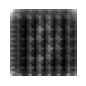

2024-06-28 11:15:15.698826: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 11, Generator Loss: 1.037305474281311, Discriminator Loss: 1.1696946620941162


2024-06-28 11:15:19.010584: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 12, Generator Loss: 0.6452698707580566, Discriminator Loss: 1.335115671157837


2024-06-28 11:15:22.147008: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 13, Generator Loss: 0.585181713104248, Discriminator Loss: 1.2370409965515137


2024-06-28 11:15:25.301479: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 14, Generator Loss: 0.8586568832397461, Discriminator Loss: 1.1266882419586182


2024-06-28 11:15:28.447799: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 15, Generator Loss: 0.5668050646781921, Discriminator Loss: 1.269441843032837


2024-06-28 11:15:31.579317: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 16, Generator Loss: 0.5988390445709229, Discriminator Loss: 1.2653188705444336


2024-06-28 11:15:34.695556: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 17, Generator Loss: 0.6409302949905396, Discriminator Loss: 1.2504616975784302


2024-06-28 11:15:37.823639: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 18, Generator Loss: 0.8511325120925903, Discriminator Loss: 1.145923137664795


2024-06-28 11:15:40.970188: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 19, Generator Loss: 1.1088531017303467, Discriminator Loss: 1.418748140335083
Epoch 20, Generator Loss: 0.8013647794723511, Discriminator Loss: 1.244088888168335


2024-06-28 11:15:44.082415: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


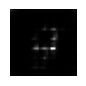

2024-06-28 11:15:50.691561: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 21, Generator Loss: 0.9196881055831909, Discriminator Loss: 1.2884013652801514


2024-06-28 11:15:57.846258: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 22, Generator Loss: 0.7241449952125549, Discriminator Loss: 1.2985925674438477


2024-06-28 11:16:05.062038: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 23, Generator Loss: 0.8308491706848145, Discriminator Loss: 1.2975661754608154


2024-06-28 11:16:12.160054: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 24, Generator Loss: 0.8791580200195312, Discriminator Loss: 1.2099933624267578


2024-06-28 11:16:19.290441: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 25, Generator Loss: 0.7890721559524536, Discriminator Loss: 1.2843555212020874


2024-06-28 11:16:26.470215: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 26, Generator Loss: 0.7417119741439819, Discriminator Loss: 1.2180883884429932


2024-06-28 11:16:31.714574: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 27, Generator Loss: 1.036487340927124, Discriminator Loss: 1.2628462314605713


2024-06-28 11:16:34.741624: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 28, Generator Loss: 0.8638930916786194, Discriminator Loss: 1.2106069326400757


2024-06-28 11:16:37.831714: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 29, Generator Loss: 0.6889433860778809, Discriminator Loss: 1.282548189163208
Epoch 30, Generator Loss: 0.6222281455993652, Discriminator Loss: 1.3533010482788086


2024-06-28 11:16:40.923768: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


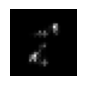

2024-06-28 11:16:44.096791: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 31, Generator Loss: 0.7420335412025452, Discriminator Loss: 1.2797342538833618


2024-06-28 11:16:47.426841: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 32, Generator Loss: 0.8345917463302612, Discriminator Loss: 1.1696685552597046


2024-06-28 11:16:50.601529: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 33, Generator Loss: 0.7736644148826599, Discriminator Loss: 1.2418389320373535


2024-06-28 11:16:53.762560: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 34, Generator Loss: 0.8424720764160156, Discriminator Loss: 1.1375794410705566


2024-06-28 11:16:56.918835: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 35, Generator Loss: 0.6027196049690247, Discriminator Loss: 1.28676176071167


2024-06-28 11:17:00.109327: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 36, Generator Loss: 0.7909854650497437, Discriminator Loss: 1.3192672729492188


2024-06-28 11:17:03.307757: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 37, Generator Loss: 0.8646475076675415, Discriminator Loss: 1.2808153629302979


2024-06-28 11:17:06.568112: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 38, Generator Loss: 0.8317115902900696, Discriminator Loss: 1.2232728004455566


2024-06-28 11:17:10.001653: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 39, Generator Loss: 0.824591875076294, Discriminator Loss: 1.1970586776733398
Epoch 40, Generator Loss: 0.7446997165679932, Discriminator Loss: 1.368290662765503


2024-06-28 11:17:13.456253: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


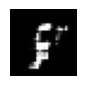

2024-06-28 11:17:17.159881: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 41, Generator Loss: 0.8643935322761536, Discriminator Loss: 1.1696100234985352


2024-06-28 11:17:20.601438: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 42, Generator Loss: 0.6907504200935364, Discriminator Loss: 1.4791468381881714


2024-06-28 11:17:24.065495: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 43, Generator Loss: 1.1005148887634277, Discriminator Loss: 1.232752799987793


2024-06-28 11:17:27.475946: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 44, Generator Loss: 0.6899253129959106, Discriminator Loss: 1.3597633838653564


2024-06-28 11:17:30.907612: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 45, Generator Loss: 0.8423464298248291, Discriminator Loss: 1.2574151754379272


2024-06-28 11:17:34.743144: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 46, Generator Loss: 0.7497574090957642, Discriminator Loss: 1.1787629127502441


2024-06-28 11:17:38.828131: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 47, Generator Loss: 0.761491060256958, Discriminator Loss: 1.4351751804351807


2024-06-28 11:17:42.895852: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 48, Generator Loss: 0.9593511819839478, Discriminator Loss: 1.0450146198272705


2024-06-28 11:17:46.988706: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 49, Generator Loss: 0.8446682691574097, Discriminator Loss: 1.203376054763794
Epoch 50, Generator Loss: 0.763034462928772, Discriminator Loss: 1.2645132541656494


2024-06-28 11:17:51.058157: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


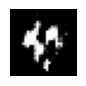

2024-06-28 11:17:55.004943: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 51, Generator Loss: 0.8982225060462952, Discriminator Loss: 1.1470627784729004


2024-06-28 11:18:02.420006: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 52, Generator Loss: 0.7415874004364014, Discriminator Loss: 1.362807035446167


2024-06-28 11:18:09.640626: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 53, Generator Loss: 1.0345593690872192, Discriminator Loss: 1.4448468685150146


2024-06-28 11:18:16.746975: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 54, Generator Loss: 0.9169702529907227, Discriminator Loss: 1.12757408618927


2024-06-28 11:18:23.898426: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 55, Generator Loss: 0.7422747015953064, Discriminator Loss: 1.3045446872711182


2024-06-28 11:18:30.956107: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 56, Generator Loss: 0.6674861907958984, Discriminator Loss: 1.265993356704712


2024-06-28 11:18:38.101960: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 57, Generator Loss: 0.6726375222206116, Discriminator Loss: 1.4697785377502441


2024-06-28 11:18:41.161224: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 58, Generator Loss: 1.1107921600341797, Discriminator Loss: 1.0780551433563232


2024-06-28 11:18:44.261945: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 59, Generator Loss: 0.6876568794250488, Discriminator Loss: 1.3416037559509277
Epoch 60, Generator Loss: 0.775101900100708, Discriminator Loss: 1.3692129850387573


2024-06-28 11:18:47.391424: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


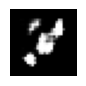

2024-06-28 11:18:50.589988: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 61, Generator Loss: 0.8602899312973022, Discriminator Loss: 1.2656686305999756


2024-06-28 11:18:53.741808: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 62, Generator Loss: 0.8343502283096313, Discriminator Loss: 1.160529613494873


2024-06-28 11:18:56.966425: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 63, Generator Loss: 0.754552960395813, Discriminator Loss: 1.3857358694076538


2024-06-28 11:19:00.167617: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 64, Generator Loss: 0.7969588041305542, Discriminator Loss: 1.292189359664917


2024-06-28 11:19:03.557096: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 65, Generator Loss: 0.7165612578392029, Discriminator Loss: 1.2318217754364014


2024-06-28 11:19:06.763029: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 66, Generator Loss: 0.732427716255188, Discriminator Loss: 1.272925853729248


2024-06-28 11:19:09.958891: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 67, Generator Loss: 0.7771654725074768, Discriminator Loss: 1.2684273719787598


2024-06-28 11:19:13.133378: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 68, Generator Loss: 0.7664517164230347, Discriminator Loss: 1.3134530782699585


2024-06-28 11:19:16.522775: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 69, Generator Loss: 0.7921121120452881, Discriminator Loss: 1.3207886219024658
Epoch 70, Generator Loss: 0.5735173225402832, Discriminator Loss: 1.3551020622253418


2024-06-28 11:19:19.992649: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


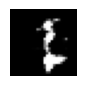

2024-06-28 11:19:23.494260: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 71, Generator Loss: 0.782200813293457, Discriminator Loss: 1.43013334274292


2024-06-28 11:19:26.935499: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 72, Generator Loss: 0.8638074994087219, Discriminator Loss: 1.279432773590088


2024-06-28 11:19:30.415879: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 73, Generator Loss: 0.9130100607872009, Discriminator Loss: 1.2001521587371826


2024-06-28 11:19:34.079179: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 74, Generator Loss: 0.7615633606910706, Discriminator Loss: 1.4794777631759644


2024-06-28 11:19:37.509851: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 75, Generator Loss: 0.9388338327407837, Discriminator Loss: 1.1802419424057007


2024-06-28 11:19:40.935011: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 76, Generator Loss: 0.9136526584625244, Discriminator Loss: 1.4226363897323608


2024-06-28 11:19:44.366591: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 77, Generator Loss: 0.8773281574249268, Discriminator Loss: 1.2705037593841553


2024-06-28 11:19:47.819366: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 78, Generator Loss: 0.837672233581543, Discriminator Loss: 1.3382292985916138


2024-06-28 11:19:51.269510: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 79, Generator Loss: 0.8897171020507812, Discriminator Loss: 1.2169537544250488
Epoch 80, Generator Loss: 0.6052070260047913, Discriminator Loss: 1.320631742477417


2024-06-28 11:19:54.679024: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


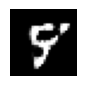

2024-06-28 11:19:58.151041: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 81, Generator Loss: 0.7772662043571472, Discriminator Loss: 1.2691681385040283


2024-06-28 11:20:01.779123: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 82, Generator Loss: 1.019066333770752, Discriminator Loss: 1.2414780855178833


2024-06-28 11:20:05.221852: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 83, Generator Loss: 0.783693253993988, Discriminator Loss: 1.3626843690872192


2024-06-28 11:20:08.681683: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 84, Generator Loss: 0.7164545655250549, Discriminator Loss: 1.421048641204834


2024-06-28 11:20:12.105750: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 85, Generator Loss: 0.7656531929969788, Discriminator Loss: 1.3613725900650024


2024-06-28 11:20:15.545218: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 86, Generator Loss: 0.7150311470031738, Discriminator Loss: 1.310333251953125


2024-06-28 11:20:18.975090: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 87, Generator Loss: 0.7510609030723572, Discriminator Loss: 1.3461977243423462


2024-06-28 11:20:22.401053: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 88, Generator Loss: 0.7103395462036133, Discriminator Loss: 1.3113319873809814


2024-06-28 11:20:25.829245: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 89, Generator Loss: 0.7477006316184998, Discriminator Loss: 1.2560869455337524
Epoch 90, Generator Loss: 0.7318609952926636, Discriminator Loss: 1.364027500152588


2024-06-28 11:20:29.267017: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


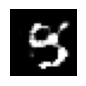

2024-06-28 11:20:32.978123: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 91, Generator Loss: 0.8166844844818115, Discriminator Loss: 1.212891697883606


2024-06-28 11:20:36.429038: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 92, Generator Loss: 0.5970218777656555, Discriminator Loss: 1.3851048946380615


2024-06-28 11:20:39.864932: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 93, Generator Loss: 0.7835952639579773, Discriminator Loss: 1.300417184829712


2024-06-28 11:20:43.318095: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 94, Generator Loss: 0.6880202293395996, Discriminator Loss: 1.4512360095977783


2024-06-28 11:20:46.757457: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 95, Generator Loss: 0.7305012345314026, Discriminator Loss: 1.42301344871521


2024-06-28 11:20:50.193669: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 96, Generator Loss: 0.6336923837661743, Discriminator Loss: 1.4249763488769531


2024-06-28 11:20:53.632616: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 97, Generator Loss: 0.7705209851264954, Discriminator Loss: 1.3702478408813477


2024-06-28 11:20:57.111536: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 98, Generator Loss: 0.8302345871925354, Discriminator Loss: 1.3824795484542847


2024-06-28 11:21:00.560627: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 99, Generator Loss: 0.7173538208007812, Discriminator Loss: 1.413626790046692
Epoch 100, Generator Loss: 0.6260185241699219, Discriminator Loss: 1.3721076250076294


2024-06-28 11:21:04.004551: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


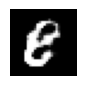

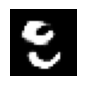

In [22]:
# Prepare the MNIST dataset
batch_size = 256
mnist_dataset = prepare_dataset(X, batch_size)

# Train the GAN
epochs = 100

# Define the directory where images will be saved
save_directory = 'training_images_CNN_' + str(epochs) + '_epochs_time_' + str(int(time.time()))

model_save_directory = 'saved_models_CNN'
loss_save_file = 'training_losses_CNN.npz'

# Create the directories if they don't exist
if not os.path.exists(model_save_directory):
    os.makedirs(model_save_directory)
    


train(mnist_dataset, epochs, save_directory, model_save_directory, loss_save_file)


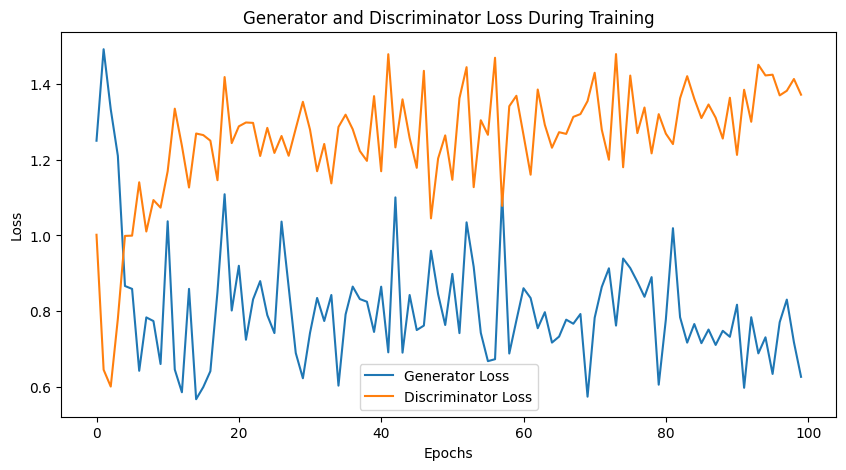

In [23]:
# Function to load and plot the losses
def plot_losses(loss_file):
    data = np.load(loss_file)
    gen_losses = data['gen_losses']
    disc_losses = data['disc_losses']

    plt.figure(figsize=(10, 5))
    plt.plot(gen_losses, label='Generator Loss')
    plt.plot(disc_losses, label='Discriminator Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Generator and Discriminator Loss During Training')
    plt.show()

# Plot the losses after training
plot_losses(loss_save_file)

In [24]:
# Function to generate and display images using the trained generator model
def generate_images(generator_model, num_images, latent_space_size):
    random_vectors = get_random_input_vector(latent_space_size, batch_size=num_images)
    generated_images = generator_model(random_vectors, training=False)

    fig = plt.figure(figsize=(10, 10))

    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(generated_images[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')

    plt.show()

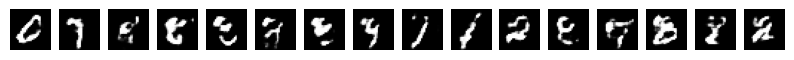

In [25]:
num_images_to_generate = 16

latent_space_size = 10

generator = keras.models.load_model('saved_models_CNN/generator_epoch_0100latent_space_size10.h5')


generate_images(generator, num_images_to_generate, latent_space_size)


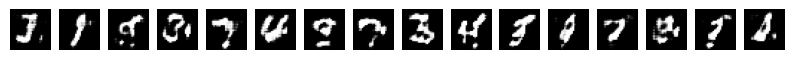

In [26]:
# Load the trained generator model
generator = keras.models.load_model('saved_models_CNN/generator_epoch_0060latent_space_size10.h5')

# Generate and display images
num_images_to_generate = 16
latent_space_size = 10  # Define the latent space size used during training
generate_images(generator, num_images_to_generate, latent_space_size)

In [27]:
latent_space_size = 2

# Optimizers for the generator and discriminator
# Optimizers for the generator and discriminator
generator_optimizer = tf.keras.optimizers.Adam(1e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4, beta_1=0.5)

# Create the discriminator model
discriminator = make_discriminator_model()
discriminator.summary()

# Create the generator model with the new latent space size
generator = make_generator_model(latent_space_size)
generator.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 256)      │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,030,145 (3.93 MB)

 Trainable params: 1,030,145 (3.93 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 12544)          │        25,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 12544)          │        50,176 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 7, 7, 128)      │       819,200 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_5              │ (None, 14, 14, 64)     │       204,800 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_12 (LeakyReLU)      │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_6              │ (None, 28, 28, 32)     │        51,200 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_13 (LeakyReLU)      │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_7              │ (None, 28, 28, 1)      │           800 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,152,160 (4.40 MB)

 Trainable params: 1,126,624 (4.30 MB)

 Non-trainable params: 25,536 (99.75 KB)

2024-06-28 11:21:08.051211: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 1, Generator Loss: 0.7457141280174255, Discriminator Loss: 1.4000585079193115


2024-06-28 11:21:11.461080: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 2, Generator Loss: 0.9269696474075317, Discriminator Loss: 1.2968239784240723


2024-06-28 11:21:14.886944: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 3, Generator Loss: 0.8949885964393616, Discriminator Loss: 1.1872637271881104


2024-06-28 11:21:18.529214: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 4, Generator Loss: 0.7689380645751953, Discriminator Loss: 1.396014928817749


2024-06-28 11:21:21.981984: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 5, Generator Loss: 0.7931129932403564, Discriminator Loss: 1.2822744846343994


2024-06-28 11:21:25.432388: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 6, Generator Loss: 0.6873549818992615, Discriminator Loss: 1.3072435855865479


2024-06-28 11:21:28.863975: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 7, Generator Loss: 0.7679763436317444, Discriminator Loss: 1.273017168045044


2024-06-28 11:21:32.332745: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 8, Generator Loss: 0.7835832834243774, Discriminator Loss: 1.3407633304595947


2024-06-28 11:21:35.774102: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 9, Generator Loss: 0.7305929660797119, Discriminator Loss: 1.3170104026794434
Epoch 10, Generator Loss: 0.7406468391418457, Discriminator Loss: 1.3839035034179688


2024-06-28 11:21:39.230768: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


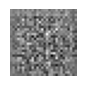

2024-06-28 11:21:42.756864: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 11, Generator Loss: 0.9031692147254944, Discriminator Loss: 1.367593765258789


2024-06-28 11:21:46.223202: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 12, Generator Loss: 0.7509582042694092, Discriminator Loss: 1.3797705173492432


2024-06-28 11:21:49.846873: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 13, Generator Loss: 0.7036195993423462, Discriminator Loss: 1.404695987701416


2024-06-28 11:21:53.296609: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 14, Generator Loss: 0.612680196762085, Discriminator Loss: 1.4629223346710205


2024-06-28 11:21:56.735536: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 15, Generator Loss: 0.7184276580810547, Discriminator Loss: 1.438413143157959


2024-06-28 11:22:00.162538: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 16, Generator Loss: 0.6484421491622925, Discriminator Loss: 1.328489065170288


2024-06-28 11:22:03.618830: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 17, Generator Loss: 0.7911404371261597, Discriminator Loss: 1.2463343143463135


2024-06-28 11:22:07.095581: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 18, Generator Loss: 0.7915706634521484, Discriminator Loss: 1.2729477882385254


2024-06-28 11:22:10.519132: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 19, Generator Loss: 0.7251536250114441, Discriminator Loss: 1.2192654609680176
Epoch 20, Generator Loss: 0.7482788562774658, Discriminator Loss: 1.4850302934646606


2024-06-28 11:22:13.923276: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


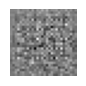

2024-06-28 11:22:17.624797: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 21, Generator Loss: 0.7633885741233826, Discriminator Loss: 1.2543635368347168


2024-06-28 11:22:21.075678: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 22, Generator Loss: 0.6773800849914551, Discriminator Loss: 1.4436551332473755


2024-06-28 11:22:24.512469: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 23, Generator Loss: 0.7197651267051697, Discriminator Loss: 1.3126848936080933


2024-06-28 11:22:27.944359: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 24, Generator Loss: 0.7522904872894287, Discriminator Loss: 1.2754864692687988


2024-06-28 11:22:31.393905: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 25, Generator Loss: 0.7903529405593872, Discriminator Loss: 1.4038580656051636


2024-06-28 11:22:34.804117: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 26, Generator Loss: 0.8030232191085815, Discriminator Loss: 1.2470526695251465


2024-06-28 11:22:38.250135: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 27, Generator Loss: 0.6904633045196533, Discriminator Loss: 1.4431915283203125


2024-06-28 11:22:41.694731: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 28, Generator Loss: 0.8340309858322144, Discriminator Loss: 1.311873197555542


2024-06-28 11:22:45.145632: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 29, Generator Loss: 0.7257636785507202, Discriminator Loss: 1.347050428390503
Epoch 30, Generator Loss: 0.6238143444061279, Discriminator Loss: 1.3581480979919434


2024-06-28 11:22:48.582600: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


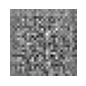

2024-06-28 11:22:52.073938: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 31, Generator Loss: 0.6879829168319702, Discriminator Loss: 1.3586983680725098


2024-06-28 11:22:55.516372: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 32, Generator Loss: 0.6801513433456421, Discriminator Loss: 1.348131537437439


2024-06-28 11:22:58.951667: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 33, Generator Loss: 0.7450463771820068, Discriminator Loss: 1.342499017715454


2024-06-28 11:23:02.591525: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 34, Generator Loss: 0.8762370347976685, Discriminator Loss: 1.2592612504959106


2024-06-28 11:23:06.022862: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 35, Generator Loss: 0.7087007761001587, Discriminator Loss: 1.3612881898880005


2024-06-28 11:23:09.461909: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 36, Generator Loss: 0.8483271598815918, Discriminator Loss: 1.3165168762207031


2024-06-28 11:23:12.886871: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 37, Generator Loss: 0.7125681042671204, Discriminator Loss: 1.4063414335250854


2024-06-28 11:23:16.324021: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 38, Generator Loss: 0.8367319703102112, Discriminator Loss: 1.3800382614135742


2024-06-28 11:23:19.766456: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 39, Generator Loss: 0.6872314810752869, Discriminator Loss: 1.40324068069458
Epoch 40, Generator Loss: 0.7547653913497925, Discriminator Loss: 1.3735214471817017


2024-06-28 11:23:23.216261: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


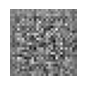

2024-06-28 11:23:26.723239: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 41, Generator Loss: 0.6810579299926758, Discriminator Loss: 1.396484375


2024-06-28 11:23:30.151395: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 42, Generator Loss: 0.7197623252868652, Discriminator Loss: 1.3298583030700684


2024-06-28 11:23:33.821122: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 43, Generator Loss: 0.698349118232727, Discriminator Loss: 1.4468640089035034


2024-06-28 11:23:37.280403: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 44, Generator Loss: 0.7417495250701904, Discriminator Loss: 1.2845016717910767


2024-06-28 11:23:40.722224: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 45, Generator Loss: 0.636306881904602, Discriminator Loss: 1.469536542892456


2024-06-28 11:23:44.179709: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 46, Generator Loss: 0.8183706402778625, Discriminator Loss: 1.2833142280578613


2024-06-28 11:23:47.619129: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 47, Generator Loss: 0.6784888505935669, Discriminator Loss: 1.396131157875061


2024-06-28 11:23:51.043435: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 48, Generator Loss: 0.7771703004837036, Discriminator Loss: 1.313446283340454


2024-06-28 11:23:54.501642: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 49, Generator Loss: 0.7070723176002502, Discriminator Loss: 1.3042752742767334
Epoch 50, Generator Loss: 0.6008470058441162, Discriminator Loss: 1.3261547088623047


2024-06-28 11:23:57.946644: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


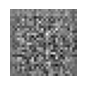

2024-06-28 11:24:01.481453: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 51, Generator Loss: 0.7393206357955933, Discriminator Loss: 1.3484928607940674


2024-06-28 11:24:05.096914: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 52, Generator Loss: 0.7533050775527954, Discriminator Loss: 1.2986215353012085


2024-06-28 11:24:08.550779: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 53, Generator Loss: 0.7052440643310547, Discriminator Loss: 1.3610082864761353


2024-06-28 11:24:11.990279: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 54, Generator Loss: 0.8578746914863586, Discriminator Loss: 1.2887327671051025


2024-06-28 11:24:15.444882: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 55, Generator Loss: 0.7225780487060547, Discriminator Loss: 1.3609192371368408


2024-06-28 11:24:18.869549: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 56, Generator Loss: 0.7088602185249329, Discriminator Loss: 1.3101487159729004


2024-06-28 11:24:22.302312: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 57, Generator Loss: 0.7559796571731567, Discriminator Loss: 1.3545728921890259


2024-06-28 11:24:25.753495: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 58, Generator Loss: 0.7513413429260254, Discriminator Loss: 1.2941994667053223


2024-06-28 11:24:29.200289: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 59, Generator Loss: 0.7453920245170593, Discriminator Loss: 1.349644422531128
Epoch 60, Generator Loss: 0.6894707679748535, Discriminator Loss: 1.3596744537353516


2024-06-28 11:24:32.652727: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


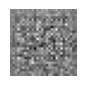

2024-06-28 11:24:36.128222: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 61, Generator Loss: 0.7537965774536133, Discriminator Loss: 1.392202377319336


2024-06-28 11:24:39.545511: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 62, Generator Loss: 0.6802544593811035, Discriminator Loss: 1.3152481317520142


2024-06-28 11:24:42.972284: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 63, Generator Loss: 0.7474929094314575, Discriminator Loss: 1.3365075588226318


2024-06-28 11:24:46.436048: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 64, Generator Loss: 0.718924880027771, Discriminator Loss: 1.3221893310546875


2024-06-28 11:24:50.033732: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 65, Generator Loss: 0.8336472511291504, Discriminator Loss: 1.3534409999847412


2024-06-28 11:24:53.469573: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 66, Generator Loss: 0.7297574281692505, Discriminator Loss: 1.3769803047180176


2024-06-28 11:24:56.939452: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 67, Generator Loss: 0.7177968621253967, Discriminator Loss: 1.3406696319580078


2024-06-28 11:25:00.398694: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 68, Generator Loss: 0.67859947681427, Discriminator Loss: 1.3771083354949951


2024-06-28 11:25:03.830021: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 69, Generator Loss: 0.760796308517456, Discriminator Loss: 1.346234917640686
Epoch 70, Generator Loss: 0.6912792921066284, Discriminator Loss: 1.4132375717163086


2024-06-28 11:25:07.257541: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


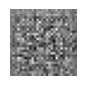

2024-06-28 11:25:10.713911: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 71, Generator Loss: 0.7531578540802002, Discriminator Loss: 1.3233760595321655


2024-06-28 11:25:14.139993: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 72, Generator Loss: 0.7333899736404419, Discriminator Loss: 1.4227149486541748


2024-06-28 11:25:17.763982: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 73, Generator Loss: 0.7941251397132874, Discriminator Loss: 1.3798960447311401


2024-06-28 11:25:21.189500: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 74, Generator Loss: 0.7149511575698853, Discriminator Loss: 1.4253754615783691


2024-06-28 11:25:24.632832: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 75, Generator Loss: 0.5327045917510986, Discriminator Loss: 1.3920178413391113


2024-06-28 11:25:28.086110: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 76, Generator Loss: 0.7594865560531616, Discriminator Loss: 1.3302481174468994


2024-06-28 11:25:31.510379: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 77, Generator Loss: 0.869230329990387, Discriminator Loss: 1.2132468223571777


2024-06-28 11:25:34.936245: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 78, Generator Loss: 0.6672976016998291, Discriminator Loss: 1.338205099105835


2024-06-28 11:25:38.337843: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 79, Generator Loss: 0.7782720327377319, Discriminator Loss: 1.4059619903564453
Epoch 80, Generator Loss: 0.6192802786827087, Discriminator Loss: 1.3990206718444824


2024-06-28 11:25:41.790294: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


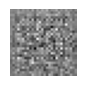

2024-06-28 11:25:45.285743: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 81, Generator Loss: 0.7957438230514526, Discriminator Loss: 1.4480159282684326


2024-06-28 11:25:48.901108: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 82, Generator Loss: 0.8138716816902161, Discriminator Loss: 1.3649628162384033


2024-06-28 11:25:52.336997: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 83, Generator Loss: 0.7497308254241943, Discriminator Loss: 1.3334035873413086


2024-06-28 11:25:55.781603: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 84, Generator Loss: 0.8802281618118286, Discriminator Loss: 1.3320642709732056


2024-06-28 11:25:59.207934: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 85, Generator Loss: 0.700371503829956, Discriminator Loss: 1.343146562576294


2024-06-28 11:26:02.618170: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 86, Generator Loss: 0.6652168035507202, Discriminator Loss: 1.3356231451034546


2024-06-28 11:26:06.029968: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 87, Generator Loss: 0.7780653238296509, Discriminator Loss: 1.2989873886108398


2024-06-28 11:26:09.499888: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 88, Generator Loss: 0.7276790142059326, Discriminator Loss: 1.3184523582458496


2024-06-28 11:26:12.913788: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 89, Generator Loss: 0.681786835193634, Discriminator Loss: 1.4125688076019287
Epoch 90, Generator Loss: 0.7553666234016418, Discriminator Loss: 1.3392038345336914


2024-06-28 11:26:16.314060: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


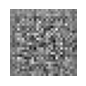

2024-06-28 11:26:19.810991: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 91, Generator Loss: 0.8043950200080872, Discriminator Loss: 1.3294463157653809


2024-06-28 11:26:23.233363: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 92, Generator Loss: 0.5655503273010254, Discriminator Loss: 1.3846763372421265


2024-06-28 11:26:26.663404: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 93, Generator Loss: 0.695432186126709, Discriminator Loss: 1.3860912322998047


2024-06-28 11:26:30.071461: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 94, Generator Loss: 0.825835645198822, Discriminator Loss: 1.2684786319732666


2024-06-28 11:26:33.715748: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 95, Generator Loss: 0.7085738182067871, Discriminator Loss: 1.372438907623291


2024-06-28 11:26:37.150728: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 96, Generator Loss: 0.5537490844726562, Discriminator Loss: 1.3886851072311401


2024-06-28 11:26:40.605418: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 97, Generator Loss: 0.7242202758789062, Discriminator Loss: 1.383476972579956


2024-06-28 11:26:44.024860: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 98, Generator Loss: 0.7598106861114502, Discriminator Loss: 1.3513543605804443


2024-06-28 11:26:47.466343: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 99, Generator Loss: 0.6830859184265137, Discriminator Loss: 1.3733879327774048
Epoch 100, Generator Loss: 0.7577147483825684, Discriminator Loss: 1.2779583930969238


2024-06-28 11:26:50.912797: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


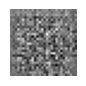

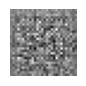

In [28]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 


# Prepare the MNIST dataset
batch_size = 256
mnist_dataset = prepare_dataset(X, batch_size)

# Train the GAN
epochs = 100

# Define the directory where images will be saved
save_directory = 'training_images_' + str(epochs) + '_epochs_time_' + str(int(time.time()))

model_save_directory = 'saved_models'
loss_save_file = 'training_losses.npz'

# Create the directories if they don't exist
if not os.path.exists(model_save_directory):
    os.makedirs(model_save_directory)
    


train(mnist_dataset, epochs, save_directory, model_save_directory, loss_save_file)


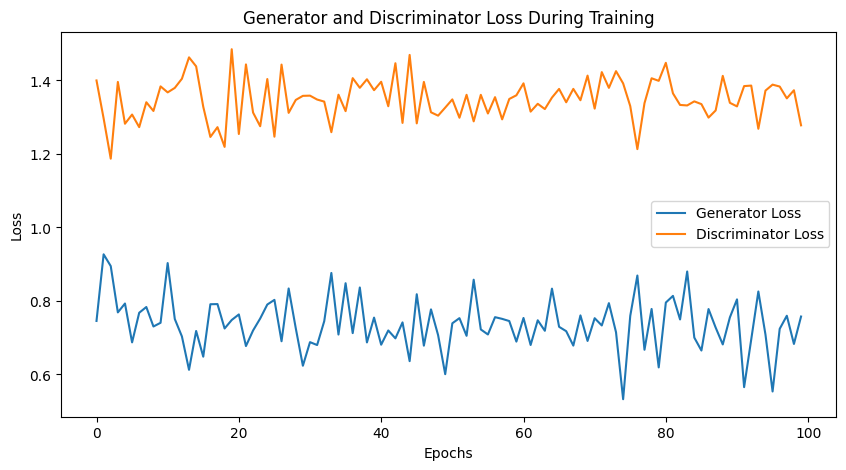

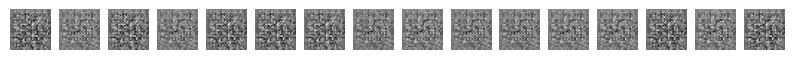

In [29]:
plot_losses(loss_save_file)

num_images_to_generate = 16

generator = keras.models.load_model('saved_models/generator_epoch_0100latent_space_size2.h5')


generate_images(generator, num_images_to_generate, latent_space_size)




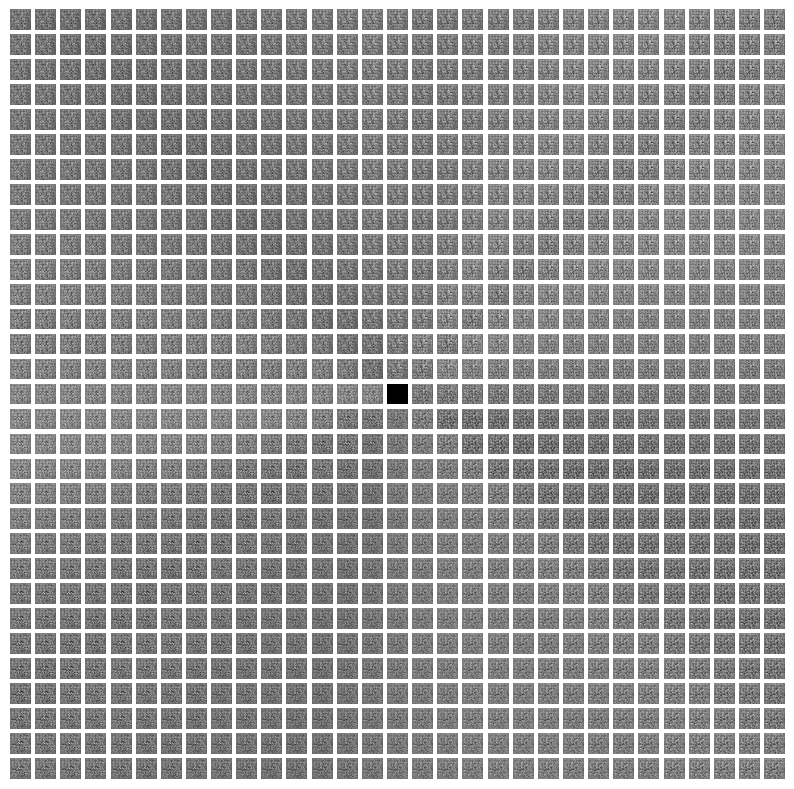

In [30]:
# Plotting the representation of the latent space
def plot_latent_space(generator_model, latent_space_size, num_points=1000):
    # Generate points in the latent space
    x = np.linspace(-1, 1, int(np.sqrt(num_points)))
    y = np.linspace(-1, 1, int(np.sqrt(num_points)))
    x, y = np.meshgrid(x, y)
    z = np.column_stack((x.flatten(), y.flatten()))

    # Generate images using the points in the latent space
    generated_images = generator_model(z, training=False)

    fig, axes = plt.subplots(int(np.sqrt(num_points)), int(np.sqrt(num_points)), figsize=(10, 10))

    for i, ax in enumerate(axes.flatten()):
        ax.imshow(generated_images[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        ax.axis('off')

    plt.show()

plot_latent_space(generator, latent_space_size)
